In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


model  = keras.Sequential([
    layers.Dense(512, activation="relu", name="layer1"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=.1)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.weights[0]

<tf.Variable 'layer1/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[-0.06327847,  0.04382915,  0.01142006, ..., -0.06407668,
         0.0269241 , -0.05193157],
       [-0.00506023, -0.01695323, -0.05225899, ..., -0.02007145,
        -0.03537   , -0.02102305],
       [ 0.05834958,  0.04020619, -0.01653786, ...,  0.05387762,
        -0.06594877, -0.02276783],
       ...,
       [-0.02695064, -0.05475594,  0.01376513, ..., -0.02951637,
         0.0500248 , -0.0229912 ],
       [ 0.02309455,  0.06542115, -0.05938246, ..., -0.03464725,
         0.02755723,  0.01115216],
       [-0.00150897, -0.05862559,  0.00118181, ...,  0.04110923,
         0.01165655,  0.01102422]], dtype=float32)>

In [5]:
model  = keras.Sequential([
    layers.Dense(512, activation="relu", name="layer1"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=.1)

Epoch 1/10


2025-06-16 13:12:45.227197: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9233 - val_loss: 0.1146 - val_accuracy: 0.9693
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9670 - val_loss: 0.0801 - val_accuracy: 0.9760
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0759 - val_accuracy: 0.9782
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0807 - val_accuracy: 0.9782
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0758 - val_accuracy: 0.9782
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0710 - val_accuracy: 0.9797
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.0791 - val_accuracy: 0.9775
Epoch 8/10
422/42

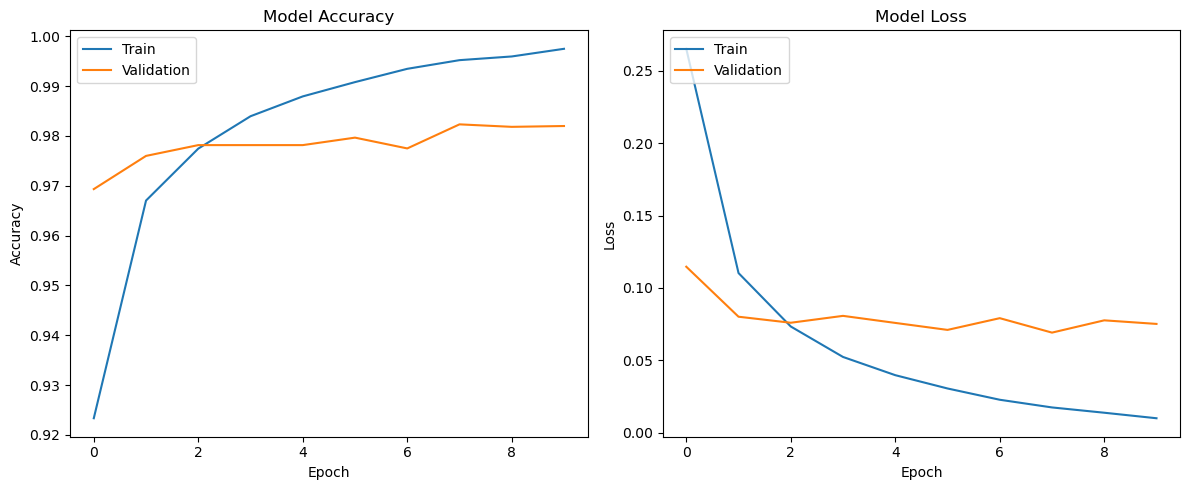

In [10]:
def plot_training_history(history, 
                          train_metric='accuracy', 
                          validation_metric='val_accuracy', 
                          title='Model Accuracy', 
                          y_label='Accuracy', 
                          x_label='Epoch'):
    '''
    
    
    
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot accuracy
    axes[0].plot(history.history[train_metric])
    axes[0].plot(history.history[validation_metric])
    axes[0].set_title(title)
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel(x_label)
    axes[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel(x_label)
    axes[1].legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
                                         
plot_training_history(history)